**Import the necessary libraries**

In [1]:
import os
import numpy as np 
import pandas as pd
import string
from collections import Counter
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Embedding, Dropout, Activation, BatchNormalization, CuDNNLSTM, concatenate, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re

!pip install num2words
from num2words import num2words

SEQUENCE_LENGTH = 35
EMBEDDING_DIM = 200

Using TensorFlow backend.


     |████████████████████████████████| 102kB 1.3MB/s 


**Loading the training data**

In [2]:
train = pd.read_csv('../input/train.csv')
#Removing the rows that have null values
train = train.dropna(how='any',axis=0) 

**Below is the data pre-processing. The following pre-processing like deciding own stop words, punctuation, correcting misspelled words, replacing contractions, replacing numbers have been identified after exploring the dataset. The Exploration techniques are there in the below cells.**

In [3]:
misspelled_words = {"automattic": "automatic", "sweetpotato": "sweet potato", "statuscode": "status code", "applylayer": "apply layer", "aligator": "alligator", "downloands": "download", "dowloand": "download", "thougths": "thoughts", "helecopter": "helicopter", "telugul": "telugu", "unconditionaly": "unconditionally", "coompanies": "companies", "lndigenous": "indigenous", "evluate": "evaluate", "suggstion": "suggestion", "thinkning": "thinking", "concatinate": "concatenate", "constitutionals": "constitutional", "moneyback": "money back", "civilazation": "civilization", "paranoria": "paranoia", "rightside": "right side", "methamatics": "mathematics", "natual": "natural", "brodcast": "broadcast", "pleasesuggest": "please suggest", "intitution": "institution", "experinces": "experiences", "reallyreally": "really", "testostreone": "testosterone", "musceles": "muscle", "bacause": "because", "peradox": "paradox", "probabity": "probability", "collges": "college", "diciplined": "disciplined", "completeted": "completed", "lunchshould": "lunch should", "battlenet": "battle net", "dissapoint": "disappoint", "resultsnew": "results new", "indcidents": "incidents", "figuire": "figure", "protonneutron": "proton neutron", "tecnical": "technical", "patern": "pattern", "unenroll": "un enroll", "proceedures": "procedures", "srategy": "strategy", "mordern": "modern", "prepartion": "preparation", "throuhout": "throught", "academey": "academic", "instituitions": "institutions", "abadon": "abandon","compitetive": "competitive", "hypercondriac": "hypochondriac", "spiliting": "splitting", "physchic": "psychic", "flippingly": "flipping", "likelyhood": "likelihood", "armsindustry": "arms industry", " turorials": "tutorials", "photostats": "photostat", "sunconcious": "subconscious", "chemistryphysics": "chemistry physics", "secondlife": "second life", "histrorical": "historical", "disordes": "disorders", "differenturl": "differential", "councilling": " counselling", "sugarmill": "sugar mill", "relatiosnhip": "relationship", "fanpages": "fan pages", "agregator": "aggregator", "switc": "switch", "smatphones": "smartphones", "headsize": "head size", "pendrives": "pen drives", "biotecnology": "biotechnology", "borderlink": "border link", "furnance": "furnace", "competetion": "competition", "distibution": "distribution", "ananlysis": " analysis", "textile？": "textile", "howww": "how", "strategybusiness": "strategy business", "spectrun": "spectrum", "propasal": "proposal", "appilcable": "applicable", "accountwhat": " account what", "algorithems": " algorithms", "protuguese": " Portuguese", "exatly": "exactly", "disturbence": "disturbance", "govrnment": "government", "requiremnt": "requirement", "vargin": "virgin", "lonleley": "lonely", "unmateralistic": "materialistic", "dveloper": "developer", "dcuments": "documents", "techonologies": "technologies", "morining": "morning", "samsing": "Samsung", "engeeniring": "engineering", "racetrac": "racetrack", "physian": "physician", "theretell": "there tell", "tryto": "try to", "teamfight": "team fight", "recomend": "recommend", "spectables": "spectacles", "emtional": "emotional", "engeenerring": "engineering", "optionsgood": "options good", "primarykey": "primary key", "foreignkey": "foreign key", "concieved": "conceived", "leastexpensive": "least expensive", "foodtech": "food tech", "electronegetivity": "electronegativity", "polticians": "politicians", "distruptive": "disruptive", "currrent": "current", "hidraulogy": "hydrology", "californa": "California", "electrrical": "electrical", "navigationally": "navigation", "whwhat": "what", "bcos": "because", "vaccancies": "vacancies", "articels": "articles", "boilng": "boiling", "hyperintensity": "hyper intensity", "rascism": "racism", "messenging": "messaging", "cleaniness": "cleanliness", "vetenary": "veterinary", "investorswhat": "investors what", "chrestianity": "Christianity", "apporval": "approval", "repaire": "repair", "biggerchance": "bigger chance", "manufacturering": "manufacturing", "buildertrend": "builder trend", "allocatively": "allocative", "subliminals": "subliminal", "mechnically": "mechanically", "binaurial": "binaural", "naaked": "naked", "aantidepressant": "antidepressant", "geunine": "genuine", "quantitaive": "quantitative", "paticipated": "participated", "repliedjesus": "replied Jesus", "baised": "biased","worldreport": "world report", "eecutives": "executives", "paitents": "patients", "telgu": "Telugu", "nomeniculature": "nomenclature", "crimimaly": "criminally", "resourse": "resource", "procurenent": "procurement", "improvemet": "improvement", "metamers": "metamer", "tautomers": "tautomer", "knowwhen": "know when","whatdoes": "what does", "pletelets": "platelets", "pssesive": "possessive", "oxigen": "oxygen", "ethniticy": "ethnicity", "situatiation": "situation", "ecoplanet": "eco planet", "situatio": "situation", "dateing": "dating", "hostress": "hostess", "initialisation": "initialization", "hydrabd": "Hyderabad", "deppresed": "depressed", "dwnloadng": "downloading", "expirey": "expiry", "engeenering": "engineering", "hyderebad": "Hyderabad", "automatabl": "automatable", "architetureocasions": "architectureoccasions", "restaraunts": "restaurants", "recommedations": "recommendations", "intergrity": "integrity", "reletively": "relatively", "priceworthy": "price worthy", "princples": "principles", "reconigze": "recognize", "paticular": "particular", "musictheory": "music theory", "requied": "required", "netural": "natural", "fluoresent": "fluorescent", "girlfiend": "girlfriend", "develpment": "development", "eridicate": "eradicate", "techologys": "technologies", "hybridyzation": "hybridization", "ideaa": "ideas", "tchnology": "technology", "appropiate": "appropriate", "respone": "response", "celebreties": "celebrities", "exterion": "exterior", "uservoice": "user voice", "effeciently": "efficiently", "torquise": "turquoise ", "governmentand": "government and", "eletricity": "electricity", "coulums": "columns", "nolonger": "no longer", "wheras": "whereas", "infnite": "infinite", "decolourised": "no color", "onepiece": "one piece", "assignements": "assignments", "celebarted": "celebrated", "pharmacistical": "pharmaceutical", "jainsingle": "Jain single", "asssistance": "assistance", "glases": "glasses", "polymorpism": "polymorphism", "amerians": "Americans", "masquitos": "mosquitoes", "interseted": "interested", "thehighest": "the highest", "etnicity": "ethnicity", "anopportunity": "anopportunity", "multidiscipline": "multi discipline", "smartchange": "smart change", "collegefest": "college fest", "disdvantages": "disadvantages", "successfcators": "success factors", "sustitute": "substitute","caoching": "coaching", "bullyed": "bullied", "comunicate": "communicate", "prisioner": "prisoner", "tamilnaadu": "Tamil Nadu", "methodologyies": "methodologies", "tranfers": "transfers", "truenorth": "true north", "backdonation": "back donation", "oreals": "ordeals", "browsec": "browser", "solarwinds": "solar winds", "susten": "sustain", "carnegi": "Carnegie", "doesent": "doesn't", "automtotive": "automotive", "nimuselide": "nimesulide", "subsciption": "subscription", "quatrone": "Quattrone", "qatalyst": "catalyst", "vardamana": "Vardaman", "suplements": "supplements", "repore": "report", "pikettys": "Piketty", "paramilltary":"paramilitary", "aboutlastnight": "about last night", "vidyapeth": "Vidyapeeth", "extraterrestial": "extraterrestrial", "powerloom": "power loom", "zonbie": "zombie", "cococola": "Coca Cola", "hameorrhage": "hemorrhage", "abhayanand": "Abhay Anand", "romedynow": "remedy now", "couster": "counter", "encouaged": "encouraged", "toprepare": "to prepare", "eveteasing": "eve teasing", "roulete": "roulette", "sorkar": "Sarkar", "waveboard": "wave board", "acclerate": "accelerate", "togrow": "to grow", "felatio": "fellatio", "baherain": "Bahrain", "teatment": "treatment", "iwitness": "eye witness", "autoplaying": "autoplay", "twise": "twice", "timeskip": "time skip", "disphosphorus": "diphosphorus", "implemnt": "implement", "proview": "preview", "pinshoppr": "pin shoppe", "protestng": "protesting", "chromatographymass": "chromatography mass", "ncache": "cache", "dowloands": "downloads", "biospecifics": "bio specifics", "conforim": "conform", "dreft": "draft", "sinhaleseand": "Sinhalese", "swivl": "swivel", "officerjms": "officers", "refrigrant": "refrigerant", "kendras": "Kendra", "alchoholism": "alcoholism", "dollor": "dollar", "jeyalalitha": "Jayalalitha", "bettner": "better", "itemstream": "timestream", "notetaking": "note taking", "cringworthy": "cringeworthy", "easyday": "easy day", "scenessex": "scenes sex", "vivavideo": "via video", "washboth": "wash both", "textout": "text out", "createwindow": "create window", "calsium": "calcium", "biofibre": "bio fibre", "emailbesides": "email besides", "kathhi": "Kathi", "cenre": "center", "polyarmory": "polyamory", "superforecasters": "super forecasters", "blogers": "bloggers", "medicalwhich": "medical which", "iiving": "living", "pronouciation": "pronunciation", "youor": "you or", "thuderbird": "Thunderbird", "oneside": "one side","spearow": "Spearow", "aanythign": "anything", "inmaking": "in making", "datamining": "data mining", "greybus": "grey bus", "onmeter": "on meter", "biling": "billing", "fidlago": "Fidalgo", "edfice": "edifice", "microsolutions": "micro solutions", "easly": "easily", "eukarotic": "eukaryotic", "accedental": "accidental", "intercasts": "interests", "oppresive": "oppressive", "generalizably": "generalizable", "tacometer": "tachometer", "loking": "looking", "scrypt": "script", "usafter": "us after", "everyweek": "every week", "hopesthe": "hopes the", "openflow": "OpenFlow", "checkride": "check ride", "springdrive": "spring drive", "emobile": "mobile", "dermotology": "dermatology", "somatrophin": "somatropin", "saywe": "say we", "multistores": "multistory", "bolognaise": "Bolognese", "hardisk": "harddisk", "penisula": "peninsula", "refferring": "referring", "freshere": "fresher", "pokemkon": "Pokemon", "nuero": "neuro", "whosampled": "who sampled", "researchkit": "research kit", "speach": "speech", "acept": "accept", "indiashoppe": "Indian shoppe","todescribe": "to describe", "hollywod": "Hollywood", "whastup": "whassup", "kjedahls": "Kjeldahl", "lancher": "launcher", "stalkees": "stalkers", "baclinks": "backlinks", "instutional": "institutional", "wassap": "Wassup", "methylethyl": "methyl ethyl", "fundbox": "fund box", "keypoints": "key points", "particually": "particularly", "loseit": "lose it", "gowipe": "go wipe", "autority": "authority", "prinicple": "principle", "complaince": "compliance", "itnormal": "it normal", "forpeople": "for people", "chaces": "chances","yearhow": "year how", "fastcomet": "fast comet", "withadd": "with add", "omnicient": "omniscient", "tofeel": "to feel", "becauseof": "because of", "laungauage": "language", "combodia": "Cambodia", "bhuvneshwer": "Bhubaneshwar", "cognito": "Cognito", "thaelsemia": "thalassemia", "meritstore": "merit store", "masterbuate": "masturbate", "planethere": "planet here", "mostof": "most of", "shallowin": "shallow in", "wordwhen": "word when", "biodesalination": "desalination", "tendulkars": "Tendulkar", "kerja": "Kerja", "sertifikat": "certificate", "indegenous": "indigenous", "lowpage": "low page", "asend": "ascend", "leadreship": "leadership", "openlab": "open lab", "foldinghome": "folding home", "sachins": "Sachin", "pleatue": "plateau", "passwor": "password", "manisfestation": "manifestation", "valryian": "valerian", "chemotaxic": "chemotaxis", "condesending": "condescending", "spiltzvilla": "splitsville", "mammaliaforme": "mammaliaform", "instituteagra": "institute agra", "learningand": "learning and", "ramamurthynagar": "Ramamurthy Nagar", "glucoses": "glucose", "imitaion": "imitation", "awited": "awaited", "realvision": "real vision", "simslot": "sim slot", "yourr": "your", "pacjage": "package", "branchth": "branch", "magzin": "magazine", "frozon": "frozen", "codescomputational": "code computational", "tempratures": "temperatures", "neurophaphy": "neuropathy", "freezone": "free zone", "speices": "species", "compaitable": "compatible", "sensilization": "sensitization", "tuboscope": "tube scope", "gamechangers": "game changer", "windsheild": "windshield", "explorerie": "explorer", "cuccina": "Cucina", "earthstone": "hearthstone", "vocabs": "vocab", "previouse": "previous", "oneview": "one view", "relance": "reliance", "waterstop": "water stop", "imput": "input", "survivers": "survivors", "benedryl": "Benadryl", "requestparam": "request param", "typeadd": "type add", "autists":"artists", "forany": "for any", "inteview": "interview", "aphantasia": "Phantasia", "lisanna": "Lisanne","civilengineering": "civil engineering", "austrailia": "Australia", "alchoholic": "alcoholic", "adaptersuch": "adapter such", "sphilosopher": "philosopher", "calenderisation": "calendarization", "smooking": "smoking", "pemdulum": "pendulum", "analsyis": "analysis", "psycholology": "psychology", "ubantu": "ubuntu", "emals": "emails", "questionth": "questions", "jawarlal": "Jawaharlal", "svaldbard": "Svalbard", "prabhudeva": "Prabhudeva", "robtics": "robotics", "umblock": "unblock", "professionaly": "professionally", "biovault": "bio vault", "bibal": "bible", "higherstudies": "higher studies", "lestoil": "less oil", "biteshow": "bike show", "humanslike": "humans like", "purpse": "purpose", "barazilian": "Brazilian", "gravitional": "gravitational", "cylinderical": "cylindrical", "peparing": "preparing", "healthequity": "health equity", "appcleaner": "app cleaner", "instantq": "instant", "abolisihed": "abolished", "kwench": "quench", "prisamatic": "prismatic", "bhubneshwar": "Bhubaneshwar", "liscense": "license", "cyberbase": "cyber base", "safezone": "safe zone", "deactivat": "deactivate", "salicyclic": "salicylic", "cocacola": "coca cola", "noice": "noise", "examinaton": "examination", "pharmavigilance": "pharmacovigilance", "sixthsense": "sixth sense","musiclly": "musically", "khardushan": "Kardashian", "chandragupt": "Chandragupta", "bayesians": "bayesian", "engineeringbut": "engineering but", "caretrust": "care trust", "girlbut": "girl but", "aviations": "aviation", "joinee": "joiner", "tutior": "tutor", "tylenal": "Tylenol", "neccesity": "necessity", "kapsule": "capsule", "prayes": "prayers", "depositmobile": "deposit mobile", "settopbox": "set top box", "meotic":"meiotic", "accidentially": "accidentally", "offcloud": "off cloud", "keshavam": "Keshava", "domaincentral": "domain central", "onetaste": "one taste", "lumpsum": "lump sum", "medschool": "med school", "digicard": "Digi card", "abroadus": "abroad", "campusexcept": "campus except", "aptittude": "aptitude", "neutrions": "neutrinos", "onepaper": "one paper", "remidies": "remedies", "convinient": "convenient", "financaily":"financially", "postives": "positives", "nikefuel": "Nike fuel", "ingrediants": "ingredients", "aspireat": "aspirate", "firstand": "first", "mohammmad": "Mohammad", "mutliple": "multiple", "dimonatization": "demonization", "cente": "center", "marshmellow": "marshmallow", "citreon": "Citroen", "theirony": "the irony", "slienced": "silenced", "identifiy": "identify", "energ": "energy", "distribuiton": "distribution", "devoloping": "developing", "maharstra": "Maharastra", "siesmologist": "seismologist", "geckoos": "geckos", "placememnt": "placement", "introvercy": "introvert", "nuerosurgeon": "neurosurgeon", "realsense": "real sense", "congac": "cognac", "plaese": "please", "addicition": "addiction", "othet": "other", "howwill": "how will", "betablockers": "beta blockers", "phython": "Python", "concelling": "counseling", "einstine": "Einstein", "takinng": "taking", "birtday": "birthday", "prefessor": "professor", "dreamscreen": "dream screen", "satyabama": "Satyabhama", "faminism": "feminism", "noooooooooo": "no", "certifaction": "certification","smalll": "small", "sterlization": "sterilization", "athelete": "athlete", "comppany": "company", "handlebreakup": "handle a breakup", "wellrounded": "well rounded", "breif": "brief", "engginering": "engineering", "genrally": "generally", "forgote": "forgot", "compuny": "the company", "wholeseller": "wholesaler", "conventioal": "conventional", "healther": "healthier", "realitic": "realistic", "israil": "Israel", "morghulis": "Margulis", "begineer": "beginner", "unwaiveringly": "unwavering", "writen": "written", "gastly": "ghastly", "obscurial": "obscure", "permanetly": "permanently", "bday": "birthday", "studing": "studying", "blackcore": "black core", "macbok": "MacBook", "realted": "related", "resoning": "reasoning", "servicenow": "service now", "medels": "medals", "hairloss": "hair loss", "messanger": "messenger", "masterbate": "masturbate", "oppurtunities": "opportunities", "newzealand": "new zealand", "offcampus": "off campus", "lonliness": "loneliness", "percentilers": "percentiles", "caccount": "account", "imrovement": "improvement", "cashbacks": "cashback", "inhand": "in hand", "baahubali": "bahubali", "diffrent": "different", "strategywho": "strategy who", "meetme": "meet me", "wealthfront": "wealth front", "masterbation": "masturbation", "successfull": "successful", "lenght": "length", "increse": "increase", "mastrubation": "masturbation", "intresting": "interesting", "quesitons": "questions", "fullstack": "full stack", "harambe": "Harambee", "criterias": "criteria", "rajyasabha": "Rajya Sabha", "techmahindra": "tech Mahindra", "messeges": "messages", "intership": "internship", "benifits": "benefits", "dowload": "download", "dellhi": "Delhi", "traval": "travel", "prepration": "preparation", "engineeringwhat": "engineering what", "habbit": "habit", "diference": "difference", "permantley": "permanently", "doesnot": "does not", "thebest": "the best", "addmision": "admission", "gramatically": "grammatically", "dayswhich": "days which", "intrest": "interest", "seperatists":"separatists", "plagarism": "plagiarism", "demonitize": "demonetize", "explaination": "explanation", "numericals": "numerical", "defination": "definition", "inmortal": "immortal", "elasticsearch": "elastic search"}

contraction_mapping = {'What”s':'what is', 'What"s':'what is',"its":"it is","What's":"what is", "'ll": "will", "n't": "not", "'re":"are", "ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "'they're":"they are","they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

contractions = set(contraction_mapping)
misspelled = set(misspelled_words)

In [4]:
def pre_processing(sentence):
    
    out = sentence.replace('\n', ' ').replace('\t', ' ').replace('\xa0',' ')\
    .replace("？", "?").replace("…", " ").replace("é", "e")
    
    for punct in "./-'_“”":
        out = out.replace(punct, ' ')
    for punct in '&':
        out = out.replace(punct, f'{punct} ')
    for punct in "∞θ÷α•à−β∅³π‘°£€\×™√²—–&©^®<→°€™›♥←×§Â█½à…★–●â►−¢²¬░¶↑±¿▾═¦║―¥▓—‹─▒：¼⊕▼▪†■’▀¨▄♫☆é¯♦¤▲è¸¾Ã⋅‘∞∙）↓、│（»，♪╩╚³・╦╣╔╗▬❤ïØ¹≤‡√シし":
        out = out.replace(punct, ' ')
    out = out.translate(str.maketrans('', '', string.punctuation))
    #out = out.translate(str.maketrans('', '', string.digits))
    out = out.lower()
    return out

#Removing the left right and in between empty spaces.
def left_right_spaces(sentence):
    new_sentence = []
    for word in sentence.split(' '):
        if word!='':
            new_sentence.append(word)
    return " ".join(new_sentence)
            
#These words are decided after exploring dataset
stop_words = ["the","a","is","to","be","are","what"]
def own_stop_words(sentence, stop_words = stop_words):
    new_sentence = []
    for word in sentence.split(' '):
        if word not in stop_words:
            new_sentence.append(word)
    return " ".join(new_sentence)

#Contractions like "aren't" are replaced with "are not"
def known_contractions(sentence):
    sentence = sentence.replace("’", "'").replace("`", "'").replace("´", "'")
    new_sentence = []
    for word in sentence.split(' '):
        if word in contractions:
            new_sentence.append(contraction_mapping[word])
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

#Spelling corrections reduces the unnecessary vocabulary also improves the dataset
def spelling_correction(sentence):
    new_sentence = []
    for word in sentence.split(' '):
        if word in misspelled:
            new_sentence.append(misspelled_words[word])
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

#url's have been replaced with url token
def check_urls(sentence):
    flag=0
    out = sentence
    for word in sentence.split(' '):
        if len(word)>3:
            url = re.findall('((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$', word)
            if len(url)>0:
                out = out.replace(word, ' url ')
                flag=1
    if flag==1:
        return out
    return sentence

#Words like india's economy, america's economy are replaced with just india economy, america economy etc. 
def smart_words(sentence):
    try:
        new_sentence = []
        for word in sentence.split(' '):
            if word=="'s":
                word=""
            new_sentence.append(re.sub('[\w]+\s*[\’\´\'\”\’\"\”]\s*[s]',word[:-2], word))            
        return " ".join(new_sentence)
    except:
        return np.NaN

#Some common country names are replaced with a common word to reduce vocabulary.
america_names = ["USA","U.S","U.S.A","U.S.","usa","US","U.S,","U.S.A,","U.S.","usa,","US,","US?","U.S?","U.S.A?","U.S.?","usa?","U.S.A?"]
uk = ["U.K","U.K?","U.K,","U.K."]
america_names = set(america_names)
uk = set(uk)
def countries(sentence):
    new_sentence = []
    for word in sentence.split(' '):
        if word in america_names:
            new_sentence.append('america')
        elif word in uk:
            new_sentence.append('united kingdom')
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)


#Symbols are replaced with the textual information to retain important information.
def replace_symbols(sentence):
    sentence = sentence.replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
    .replace("€", " euro").replace("?",'').replace("INR"," rupee ").replace("Rs."," rupee ").replace("Rs"," rupee ")
    
    return sentence

#Numbers like 100k is replaced with 100 thousand, 21yrs is replaced with 21 years, 1990's with 1990 and so on.
def preprocessing_numbers(row):
    row = re.sub('(?<=[0-9])\,(?=[0-9])', "", row) #removing ,(comma) between the numbers
    new_sentence = []
    for word in row.split(' '):
        match = re.match(r"(^[0-9]+)(\'*\’*k{1}$)", word)
        if match:
            items = match.groups()
            new_sentence.append(items[0])
            new_sentence.append('thousand')
        else:
            new_sentence.append(word)
            
    sentence = " ".join(new_sentence)
    new_sentence = []
    for word in sentence.split(' '):
        match = re.match(r"(^[0-9]+)(\'*\’*y{1}r?s?$)", word)
        if match:
            items = match.groups()
            new_sentence.append(items[0])
            new_sentence.append('year')
        else:
            new_sentence.append(word)

    sentence = " ".join(new_sentence)
    new_sentence = []
    for word in sentence.split(' '):
        match = re.match(r"(^[0-9]+)(\'*\’*s{1}$)", word)
        if match:
            items = match.groups()
            new_sentence.append(items[0])
        else:
            new_sentence.append(word)

    sentence = " ".join(new_sentence)
    new_sentence = []
    for word in sentence.split(' '):
        match = re.match(r"([0-9]+)([a-zA-Z]+)", word)
        if match:
            items = match.groups()
            new_sentence.append(items[0])
            new_sentence.append(items[1])
        else:
            new_sentence.append(word)
    return " ".join(new_sentence)

#Numbers are replaced with textual information to retain the value of sentence.
def num_to_text(sentence):
    sentence = sentence.replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
    .replace("€", " euro").replace("?",'').replace("INR"," rupee ").replace("Rs."," rupee ")
    new_sentence = []
    for word in sentence.split(' '):
        try:
            word = int(word)
            if word<=1000 and word>0:
                text = num2words(word)
                new_sentence.append(text)
            else:
                new_sentence.append(str(word))
        except:
            new_sentence.append(str(word))
    return " ".join(new_sentence)

**Applying the above steps using .apply() function.**

In [5]:
#Processing training data
train['question1'] = train['question1'].apply(countries)
train['question2'] = train['question2'].apply(countries)

train['question1'] = train['question1'].apply(known_contractions)
train['question2'] = train['question2'].apply(known_contractions)

train['question1'] = train['question1'].apply(smart_words)
train['question2'] = train['question2'].apply(smart_words)
train = train.dropna(how='any',axis=0) 

train['question1'] = train['question1'].apply(replace_symbols)
train['question2'] = train['question2'].apply(replace_symbols)

train['question1'] = train['question1'].apply(preprocessing_numbers)
train['question2'] = train['question2'].apply(preprocessing_numbers)

train['question1'] = train['question1'].apply(num_to_text)
train['question2'] = train['question2'].apply(num_to_text)

train['question1'] = train['question1'].apply(check_urls)
train['question2'] = train['question2'].apply(check_urls)

train['question1'] = train['question1'].apply(num_to_text)
train['question2'] = train['question2'].apply(num_to_text)

train['question1'] = train['question1'].apply(pre_processing)
train['question2'] = train['question2'].apply(pre_processing)

train['question1'] = train['question1'].apply(own_stop_words)
train['question2'] = train['question2'].apply(own_stop_words)

train['question1'] = train['question1'].apply(spelling_correction)
train['question2'] = train['question2'].apply(spelling_correction)

train['question1'] = train['question1'].apply(preprocessing_numbers)
train['question2'] = train['question2'].apply(preprocessing_numbers)

train['question1'] = train['question1'].apply(num_to_text)
train['question2'] = train['question2'].apply(num_to_text)

train['question1'] = train['question1'].apply(left_right_spaces)
train['question2'] = train['question2'].apply(left_right_spaces)

**Data Exploration**

**Classifying the dataset into duplicate and non-duplicate to explore the data.**

In [6]:
duplicate_dataset = train[train["is_duplicate"] == 1]
non_duplicate_dataset = train[train["is_duplicate"] == 0]

In [7]:
#Calculating the vocab size and creating a dictionary to check the frequency of those words.
words_1 = []
for doc in train['question1']:
    for word in doc.split(' '):
        if word!='':
            words_1.append(word)

words_2 = []
for doc in train['question2']:
    for word in doc.split(' '):
        if word!='':
            words_2.append(word)

words_1_count = Counter(words_1)
words_2_count = Counter(words_2)

total_words = words_1_count + words_2_count
vocab_size = len(total_words)

print("Total vocab size:", vocab_size)
print(words_1_count.most_common(10))
print(words_2_count.most_common(10))

del words_1
del words_2
del words_1_count
del words_2_count


Total vocab size: 83586
[('how', 109416), ('i', 105487), ('in', 98031), ('do', 82364), ('of', 79921), ('and', 70121), ('can', 56164), ('for', 51903), ('you', 46433), ('why', 41940)]
[('i', 117450), ('how', 111185), ('in', 99029), ('do', 86585), ('of', 79903), ('and', 69844), ('can', 57975), ('for', 52580), ('you', 46653), ('why', 42075)]


**n-grams are the continuous sequence of words. They can be single words if n is equal to 1 or continuous sequence of two words if n is equal to 2 and so on.**

For instance, suppose the sentence is "Hello, how are you".

If n = 1 then the list would be [Hello, how, are, you]

If n = 2 then the list would be [Hello how, how are, are you]

If n = 3 then the list would be [Hello how are, how are you]

In [8]:
def n_grams(count, dataset, name):
    d1 = dataset['question1']
    d2 = dataset['question2']
    frames = [d1,d2]
    result = pd.concat(frames)
    n_grams_1 = []
    for row in result:
        total_words = row.split(' ')
        for i in range(0,len(total_words)-(count-1)):
            n_grams_1.append(' '.join(total_words[i:count+i]))
    n_grams_1 = Counter(n_grams_1)
    df = pd.DataFrame(list(n_grams_1.items()), columns=['words', 'count'])
    df.sort_values(by=['count'], ascending=False, inplace=True)
    
    fig = sns.barplot(x = df["words"][:20], y= df["count"][:20])
    plt.xticks(rotation=90)
    plt.title(name)
    return fig

**Below is the plot of occurences of n-grams in the duplicate and non-duplicate sentences.**

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)


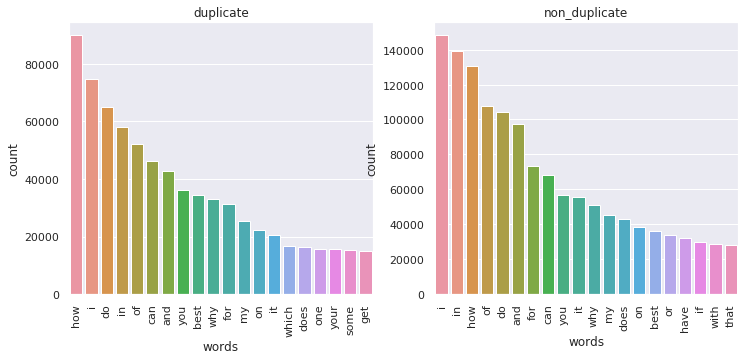

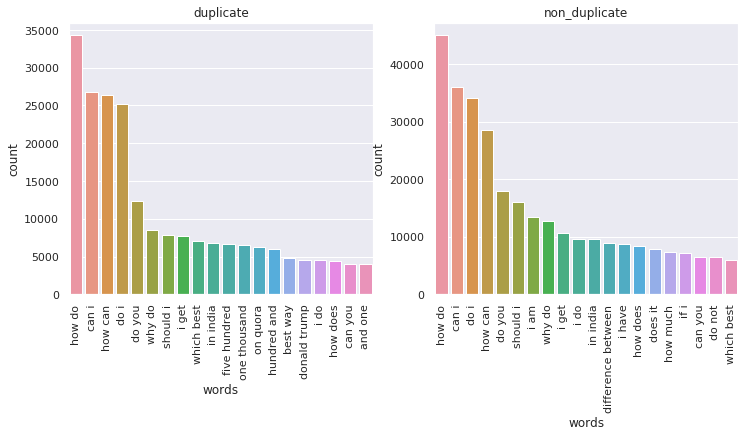

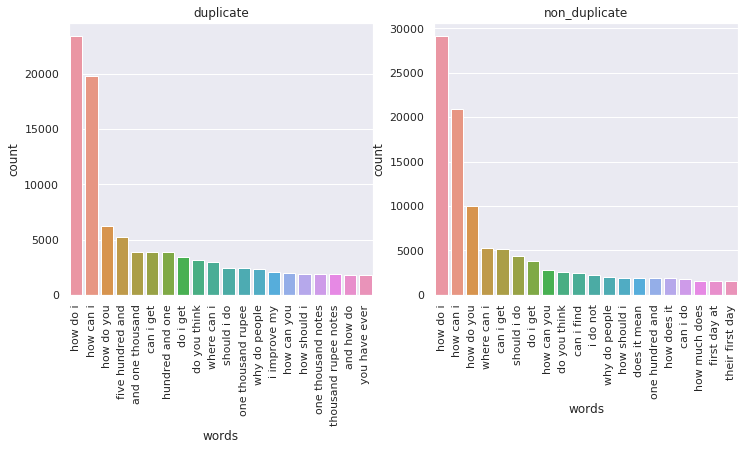

In [9]:
for k in range(1,4):
    fig = plt.figure(figsize=(12, 11))
    for i in range(1, 2):
        plt.subplot(2, 2, i)
        print(n_grams(k, duplicate_dataset, "duplicate"))
        plt.subplot(2, 2, i+1)
        print(n_grams(k, non_duplicate_dataset, "non_duplicate"))

**Checking the word length of each sentence in both the columns, question1 and question2. This will help us decide the sequence length during model training.**

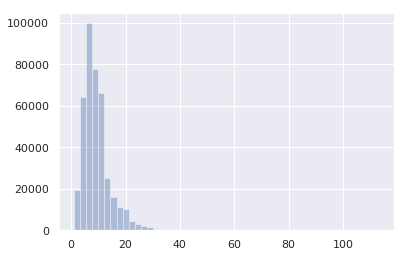

In [10]:
#Checking the word length of all rows.
values = []
for row in train['question1']:
    values.append(len(row.split(' ')))
values = np.array(values)

sns.distplot(values, kde = False)

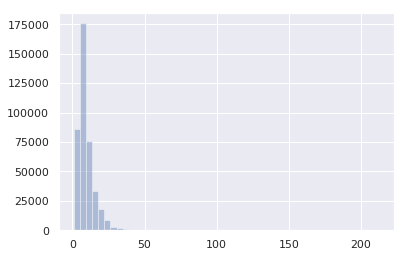

In [11]:
#Checking the word length of all rows.
values = []
for row in train['question2']:
    values.append(len(row.split(' ')))
values = np.array(values)

sns.distplot(values, kde = False)

#We can see that most of the questions have word length in between 0 and 150.

**Now, after all the pre-processing is done, words are replaced with word embeddings. You can also train your own word embeddings. Here, I am using GloVe embeddings.**

These are 200 dimensional vectors, that means every word is represented using 200 length vector. This length is tunable and we should try multiple length vectors and choose the best one.

In [12]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip glove*.zip

!rm glove.6B.zip
!rm glove.6B.zip.100d.txt
!rm glove.6B.zip.300d.txt
!rm glove.6B.zip.50d.txt

total_words = set(total_words)
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.200d.txt', encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    if word in total_words:
        coefs = np.asarray(values[-200:], dtype='float32')
        embeddings_index[word] = coefs
    if len(embeddings_index)==len(total_words):
        print("done")
f.close()
print('Found %s word vectors.' % len(embeddings_index))

!rm glove.6B.zip.200d.txt

--2019-07-17 05:00:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-07-17 05:00:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-07-17 05:00:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [13]:
print("Total number of words (vocabulary size): ", len(total_words))
print("Embeddings found for the words: ", len(embeddings_index))
print("Percentage of words having embeddings: ", (len(embeddings_index)/len(total_words))*100)
print("Percentage of words not having embeddings: ", 100 - (len(embeddings_index)/len(total_words))*100)
del total_words

Total number of words (vocabulary size):  83586
Embeddings found for the words:  59681
Percentage of words having embeddings:  71.40071303806857
Percentage of words not having embeddings:  28.599286961931426


In [14]:
train = train.sample(frac=1) #Shuffles the entire dataset. argument frac is set in range [0,1]. 1 indicates returning all the rows after shuffling.
target = train['is_duplicate']
train.drop(['is_duplicate','qid1','qid2','id'], axis = 1, inplace = True)

**Splitting the dataset into trainng and validation to test our model's predictions on unseen data.**

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train, target, stratify = target, test_size=0.2)
del train
del duplicate_dataset 
del non_duplicate_dataset

In [16]:
#Converting the words in the sentence to respective Glove word emebddings.
def embeddings(sentence):
    new_sentence = []
    for word in sentence.split(' '):
        if word in embeddings_index:
            new_sentence.append(embeddings_index[word])
        else:
            new_sentence.append(np.zeros(EMBEDDING_DIM))
    return new_sentence

In [17]:
#Designing the architecture
sequence_1_input = Input(shape = (SEQUENCE_LENGTH , EMBEDDING_DIM))
x1 = CuDNNLSTM(256, return_sequences = True)(sequence_1_input)
x1 = Dropout(0.3)(x1)
x2 = CuDNNLSTM(128)(x1)

sequence_2_input = Input(shape = (SEQUENCE_LENGTH , EMBEDDING_DIM))
y1 = CuDNNLSTM(256, return_sequences = True)(sequence_2_input)
y1 = Dropout(0.3)(y1)
y2 = CuDNNLSTM(128)(y1)

merged = concatenate([x2, y2])

merged = BatchNormalization()(merged)
merged = Dense(200, activation='relu')(merged)
merged = Dropout(0.3)(merged)

merged = BatchNormalization()(merged)
merged = Dense(200, activation='relu')(merged)
merged = Dropout(0.3)(merged)

merged = BatchNormalization()(merged)
merged = Dense(200, activation='relu')(merged)
merged = Dropout(0.3)(merged)

merged = BatchNormalization()(merged)
merged = Dense(200, activation='relu')(merged)
merged = Dropout(0.3)(merged)

preds = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[sequence_1_input, sequence_2_input], outputs=preds)

model.compile(loss='binary_crossentropy', optimizer = 'adam')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35, 200)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 35, 200)]    0                                            
__________________________________________________________________________________________________
cu_dnnlstm (CuDNNLSTM)          (None, 35, 256)      468992      input_1[0][0]                    
__________________________________________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)        (None, 35, 256)      468992      input_2[0][0]                    
______________________________________________________________________________________________

Here, I am training the dataset in batches since the RAM cannot handle the entire dataset having 300 dimensional word vectors all at once. So I am training 30,000 samples in iteration. A single epoch will undergo training of all the samples in a dataset (one after another batch). 1 epoch will have length(dataset)/30000 number of iterations.  

In [18]:
final_epochs = 1
count = 30000

checkpoint = ModelCheckpoint('saved_model.hdf5', monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

for k in range(0, final_epochs):
    print("Epoch no: ", k)
    for i in range(len(X_train)//count):
        data1 = X_train['question1'][i*count:(i+1)*count]
        data2 = X_train['question2'][i*count:(i+1)*count]
        data1 = data1.apply(embeddings)
        data2 = data2.apply(embeddings)

        data1 = pad_sequences(data1, maxlen=SEQUENCE_LENGTH, padding = 'pre', dtype="float32")
        data2 = pad_sequences(data2, maxlen=SEQUENCE_LENGTH, padding = 'pre', dtype="float32")
        
        val1 = X_val['question1']
        val2 = X_val['question2']
        val1 = val1.apply(embeddings)
        val2 = val2.apply(embeddings)

        val1 = pad_sequences(val1, maxlen=SEQUENCE_LENGTH, padding = 'pre', dtype="float32")
        val2 = pad_sequences(val2, maxlen=SEQUENCE_LENGTH, padding = 'pre', dtype="float32")
        

        labels_train = np.array(y_train[i*count:(i+1)*count])
        labels_val = np.array(y_val)

        model.fit([data1, data2], labels_train,
                  validation_data=([val1, val2], labels_val), epochs = 1,
                  batch_size = 1024, callbacks = callbacks_list)


Epoch no:  0
Train on 30000 samples, validate on 80843 samples
29696/30000 [============================>.] - ETA: 0s - loss: 0.6836
Epoch 00001: val_loss improved from inf to 0.67912, saving model to saved_model.hdf5
30000/30000 [==============================] - 15s 496us/sample - loss: 0.6834 - val_loss: 0.6791
Train on 30000 samples, validate on 80843 samples
29696/30000 [============================>.] - ETA: 0s - loss: 0.6236
Epoch 00001: val_loss improved from 0.67912 to 0.64840, saving model to saved_model.hdf5
30000/30000 [==============================] - 9s 314us/sample - loss: 0.6236 - val_loss: 0.6484
Train on 30000 samples, validate on 80843 samples
29696/30000 [============================>.] - ETA: 0s - loss: 0.6014
Epoch 00001: val_loss improved from 0.64840 to 0.63840, saving model to saved_model.hdf5
30000/30000 [==============================] - 10s 323us/sample - loss: 0.6012 - val_loss: 0.6384
Train on 30000 samples, validate on 80843 samples
29696/30000 [========

In [19]:
del data1, data2, val1,val2
del labels_train, labels_val
del model
import gc
gc.collect()

34